# Multiple Linear Regression

### Task 1: Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Load the dataset
data = pd.read_csv("ToyotaCorolla - MLR.csv")

# Display summary statistics
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())         #no missing values to handle


Missing Values:
Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [37]:
print(data["Cylinders"])

0       4
1       4
2       4
3       4
4       4
       ..
1431    4
1432    4
1433    4
1434    4
1435    4
Name: Cylinders, Length: 1436, dtype: int64


In [27]:
data.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


**The Cylinders column doesn't have any linear relationship with other columns**

<AxesSubplot:>

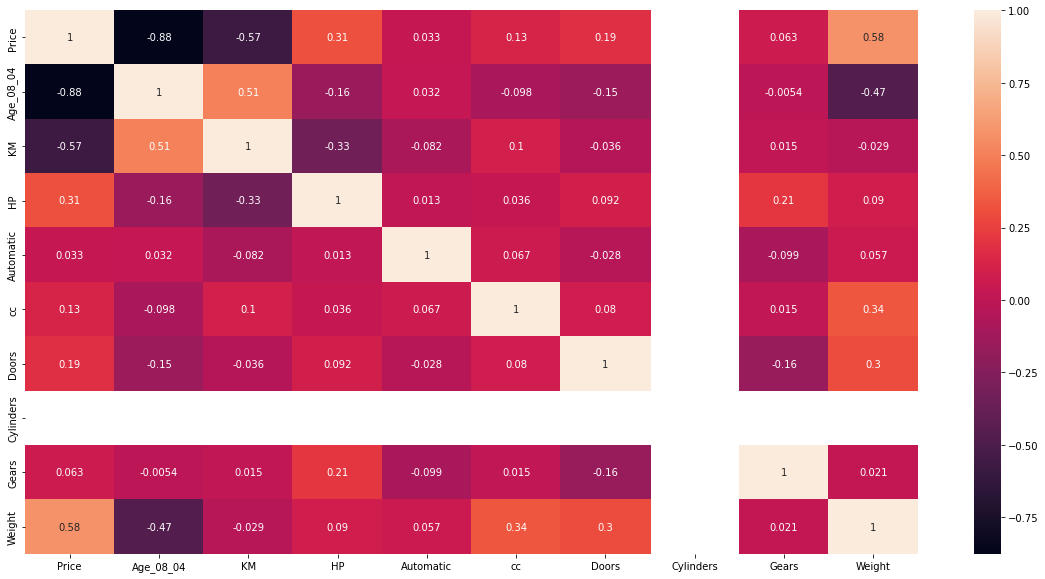

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

Text(0.5, 1.0, 'Histogram for KM')

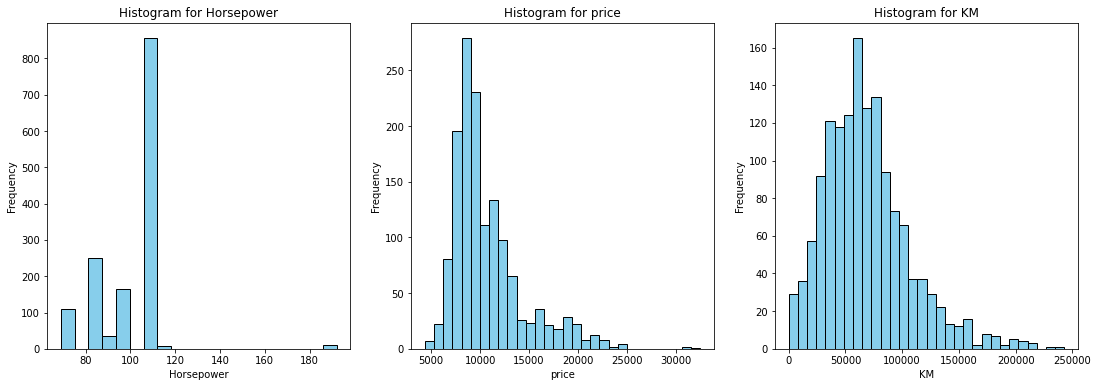

In [84]:
plt.figure(figsize=(25,6))
plt.subplot(141)
plt.hist(data['HP'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.title('Histogram for Horsepower')

plt.subplot(142)
plt.hist(data['Price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Histogram for price')

plt.subplot(143)
plt.hist(data['KM'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('KM')
plt.ylabel('Frequency')
plt.title('Histogram for KM')


**Horsepower has some outliers, most of the cars are with HP 110**

**Most of the car price range between 7000-11000**

**Higest car accumulated km on odometer lies between 50000,10000**



Text(0, 0.5, 'offer price')

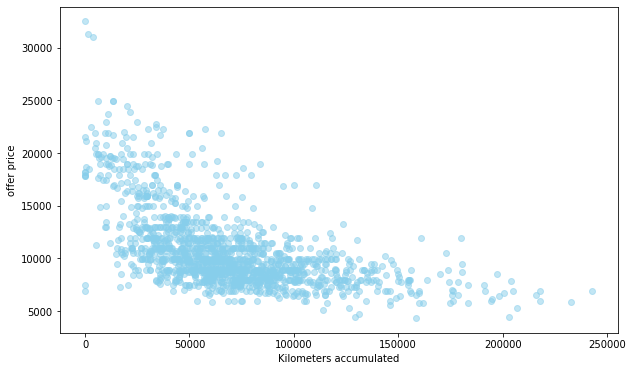

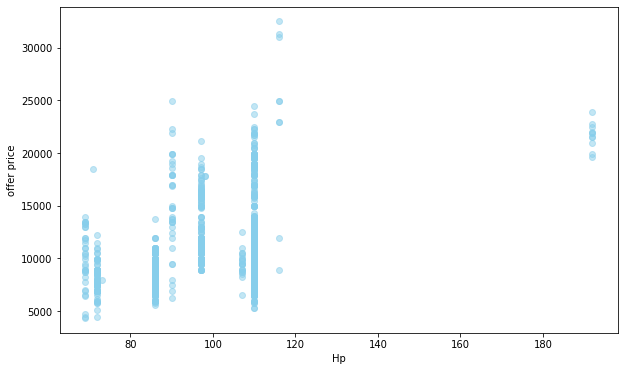

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(data['KM'], data['Price'], color='skyblue', alpha=0.5)
plt.xlabel("Kilometers accumulated")
plt.ylabel("offer price")


plt.figure(figsize=(10, 6))
plt.scatter(data['HP'], data['Price'], color='skyblue', alpha=0.5)
plt.xlabel("Hp")
plt.ylabel("offer price")

**1.If we see the km vs offer price scatter plot we can see that most of the cars falls under 50000-100000kms and $5000-$15000**


**2.if we see the hp vs offer price scatter plot we can see that there are some outliers where the HP is greater than 180**


In [ ]:
# Preprocess the data
# Convert categorical variables into dummy variables
data = pd.get_dummies(data, columns=['Fuel_Type', 'Automatic'])

In [39]:
# Split the data into features and target
x = data.drop('Price', axis=1)
y = data['Price']


### Task 2: Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [40]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape :", x_train.shape, "y:", y_train.shape)
print("Testing set shape:", x_test.shape, "y:", y_test.shape)

Training set shape : (1148, 10) y: (1148,)
Testing set shape: (288, 10) y: (288,)


### Task 3 : Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [8]:
from sklearn.linear_model import LinearRegression

# Build the first MLR model
model_1 = LinearRegression()
model_1.fit(x_train, y_train)

LinearRegression()

In [9]:
# Interpret coefficients of the first model
coefficients_1 = pd.DataFrame(model_1.coef_, index=X.columns, columns=['Coefficient'])
print("Coefficients of Model 1:")
print(coefficients_1)

Coefficients of Model 1:
                   Coefficient
Age_08_04        -1.208305e+02
KM               -1.623141e-02
HP                1.403948e+01
cc               -3.037219e-02
Doors            -6.031097e+01
Cylinders        -5.684342e-14
Gears             5.516007e+02
Weight            2.588496e+01
Fuel_Type_CNG    -4.340867e+02
Fuel_Type_Diesel -5.026355e+02
Fuel_Type_Petrol  9.367222e+02
Automatic_0      -7.441546e+01
Automatic_1       7.441546e+01


In [10]:
# Build the second MLR model
selected_features = ['Age_08_04', 'KM', 'HP', 'Weight']
X_train_selected = X_train[selected_features]
model_2 = LinearRegression()
model_2.fit(X_train_selected, y_train)

LinearRegression()

In [11]:
# Interpret coefficients of the second model
coefficients_2 = pd.DataFrame(model_2.coef_, index=selected_features, columns=['Coefficient'])
print("\nCoefficients of Model 2 (with selected features):")
print(coefficients_2)


Coefficients of Model 2 (with selected features):
           Coefficient
Age_08_04  -120.025405
KM           -0.020233
HP           29.052170
Weight       19.769066


In [12]:
# Build the third MLR model (example: including all features)
model_3 = LinearRegression()
model_3.fit(X_train, y_train)

LinearRegression()

In [13]:
# Interpret coefficients of the third model
coefficients_3 = pd.DataFrame(model_3.coef_, index=X.columns, columns=['Coefficient'])
print("\nCoefficients of Model 3 (with all features):")
print(coefficients_3)


Coefficients of Model 3 (with all features):
                   Coefficient
Age_08_04        -1.208305e+02
KM               -1.623141e-02
HP                1.403948e+01
cc               -3.037219e-02
Doors            -6.031097e+01
Cylinders        -5.684342e-14
Gears             5.516007e+02
Weight            2.588496e+01
Fuel_Type_CNG    -4.340867e+02
Fuel_Type_Diesel -5.026355e+02
Fuel_Type_Petrol  9.367222e+02
Automatic_0      -7.441546e+01
Automatic_1       7.441546e+01


### Task 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Evaluate Model 1
y_pred_1 = model_1.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)
print("Evaluation Metrics for Model 1:")
print("Mean Squared Error:", mse_1)
print("R-squared Score:", r2_1)

Evaluation Metrics for Model 1:
Mean Squared Error: 2203043.823143702
R-squared Score: 0.8348888040611082


In [16]:
# Evaluate Model 2
X_test_selected = X_test[selected_features]  # Using the same selected features as in Model 2
y_pred_2 = model_2.predict(X_test_selected)
mse_2 = mean_squared_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)
print("\nEvaluation Metrics for Model 2:")
print("Mean Squared Error:", mse_2)
print("R-squared Score:", r2_2)



Evaluation Metrics for Model 2:
Mean Squared Error: 1993321.0129730718
R-squared Score: 0.8506068681500581


In [17]:
# Evaluate Model 3
y_pred_3 = model_3.predict(X_test)
mse_3 = mean_squared_error(y_test, y_pred_3)
r2_3 = r2_score(y_test, y_pred_3)
print("\nEvaluation Metrics for Model 3:")
print("Mean Squared Error:", mse_3)
print("R-squared Score:", r2_3)


Evaluation Metrics for Model 3:
Mean Squared Error: 2203043.823143702
R-squared Score: 0.8348888040611082


### Task 5.Apply Lasso and Ridge methods on the model.

In [18]:
# using model 2 since its more accurate and efficient
from sklearn.linear_model import Lasso, Ridge

# Apply Lasso regularization
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_selected, y_train)

Lasso(alpha=0.1)

In [19]:
# Evaluate Lasso model
y_pred_lasso = lasso_model.predict(X_test_selected)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("\nEvaluation Metrics for Lasso Model:")
print("Mean Squared Error:", mse_lasso)
print("R-squared Score:", r2_lasso)


Evaluation Metrics for Lasso Model:
Mean Squared Error: 1993323.3178870243
R-squared Score: 0.8506066954040169


In [20]:
# Apply Ridge regularization
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha parameter as needed
ridge_model.fit(X_train_selected, y_train)

Ridge(alpha=0.1)

In [21]:
# Evaluate Ridge model
y_pred_ridge = ridge_model.predict(X_test_selected)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nEvaluation Metrics for Ridge Model:")
print("Mean Squared Error:", mse_ridge)
print("R-squared Score:", r2_ridge)


Evaluation Metrics for Ridge Model:
Mean Squared Error: 1993321.2820191267
R-squared Score: 0.8506068479859037


**Interview question**

**1.What is Normalization & Standardization and how is it helpful?**

Nomalization is a technique used to scale the individual sample for example when the features varies in scale or units it ranges between 0 to 1,It rescales the value to a common scale

**2.What techniques can be used to address multicollinearity in multiple linear regression?**

Multicollinearity is when two or more features are highly correlated with each other

Techniques to address multicolinearity :-
1.Feature Selection:remove the feature that is highly correlated and choose most relevant predictors

2.Principal Component Analysis (PCA):transforms the original predictors into a smaller set of uncorrelated variables.

